In [1]:
#!pip install cinemagoer

In [257]:
# Import Libraries/Packages
from imdb import Cinemagoer # object that allows to select data from imdb database
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import statistics

<h1><font color="blue">Import data</font></h1>

In [7]:
ia = Cinemagoer() # an instance of the Cinemagoer object

In [8]:
search_results = ia.search_person("Nicolas Cage")

In [9]:
print(search_results)

[<Person id:0000115[http] name:_Nicolas Cage_>, <Person id:7751235[http] name:_Nicolas Cantu_>, <Person id:1002627[http] name:_Nicolas Cazalé_>, <Person id:0184610[http] name:_Nicolas Cowan_>, <Person id:0182661[http] name:_Nicolas Coster_>, <Person id:13207331[http] name:_Nicolas Calero_>, <Person id:2089023[http] name:_Nicolas Capus_>, <Person id:0190988[http] name:_Nicolas Cuche_>, <Person id:1454105[http] name:_Nicolas Cadot_>, <Person id:12419960[http] name:_Nicolas Cala_>, <Person id:0779622[http] name:_Nicola Scott (I)_>, <Person id:1211208[http] name:_Nicolas Cade_>, <Person id:9004199[http] name:_Nicolas Carcagno_>, <Person id:1216045[http] name:_Nicolas Canniccioni_>, <Person id:1291566[http] name:_Nicolas Chartier_>, <Person id:2457419[http] name:_Nicolas Cagniard_>, <Person id:1904184[http] name:_Nicolas Caeyers_>, <Person id:12968593[http] name:_Nicolas Calas_>, <Person id:9076150[http] name:_Nicola Scavo_>, <Person id:8666615[http] name:_Nicolas Carra_>]


In [10]:
nic_cage = ia.get_person('0000115') # using Nicolas Cage's person ID # as my variable

In [11]:
print(nic_cage) # shows the right Nicolas Cage!

Nicolas Cage


In [12]:
nic_cage.keys() # available values to use to obtain certain information for a person

['birth info',
 'headshot',
 'akas',
 'filmography',
 'in development',
 'imdbID',
 'name',
 'nick names',
 'birth name',
 'height',
 'mini biography',
 'trade mark',
 'trivia',
 'quotes',
 'salary history',
 'birth date',
 'birth notes',
 'canonical name',
 'long imdb name',
 'long imdb canonical name',
 'full-size headshot']

In [13]:
nic_cage["filmography"]

{'actor': [<Movie id:1462759[http] title:_Butcher's Crossing () (None)_>,
  <Movie id:11358390[http] title:_Renfield (2023)_>,
  <Movie id:8593824[http] title:_The Old Way (2022)_>,
  <Movie id:14827638[http] title:_The Retirement Plan (2022)_>,
  <Movie id:12261642[http] title:_Untitled Joe Exotic Project () (None)_>,
  <Movie id:11291274[http] title:_The Unbearable Weight of Massive Talent (2022)_>,
  <Movie id:11003218[http] title:_Pig (I) (2021)_>,
  <Movie id:8114980[http] title:_Willy's Wonderland (2021)_>,
  <Movie id:6372694[http] title:_Prisoners of the Ghostland (2021)_>,
  <Movie id:2850386[http] title:_The Croods: A New Age (2020)_>,
  <Movie id:9624766[http] title:_Jiu Jitsu (2020)_>,
  <Movie id:8380776[http] title:_Grand Isle (2019)_>,
  <Movie id:7394816[http] title:_Primal (2019)_>,
  <Movie id:8535180[http] title:_Kill Chain (2019)_>,
  <Movie id:5792656[http] title:_Running with the Devil (2019)_>,
  <Movie id:5073642[http] title:_Color Out of Space (2019)_>,
  <Movi

In [14]:
cage_movies = nic_cage['filmography']['actor']

 <h2><font color="blue">Main Dataframe</font></h2>

In [15]:
df = pd.DataFrame({
    'title': [],
    'rating': [],
    'genres': [],
    'votes': [],
    'languages': [],
    'runtimes': [],
    'countries': [],
    'plot outline': [],
    'director': [],
    'year': [],
    'writer': [],
    'producer': [],
    'composer': [],
    'cinematographer': [],
    'editor': [],
    'editorial department': [],
    'casting director': [],
    'art direction': [],
    'costume designer': [],
    'make up': [],
    'production manager': [],
    'assistant director': [],
    'art department': [],
    'sound crew': [],
    'special effects': [],
    'visual effects': [],
    'stunt performer': [],
    'production companies': [],
    'distributors': [],
    'special effects companies': [],
    'other companies': [],
})

In [16]:
for x in cage_movies:
    cage_movie = ia.get_movie(x.getID())  # get film from Movie ID 
    df = df.append({
        'title': cage_movie.get("title", ""),
        'rating': cage_movie.get("rating", np.nan),
        'genres': ";".join([str(x) for x in cage_movie.get("genres", "")]),
        'votes': cage_movie.get("votes", 0),
        'languages': ";".join([str(x) for x in cage_movie.get("languages", "")]),
        'runtimes': cage_movie.get("runtimes", ["0"])[0],
        'countries': ";".join([str(x) for x in cage_movie.get("countries", "")]),
        'plot outline': cage_movie.get("plot outline", ""),
        'director': ";".join([str(x) for x in cage_movie.get("director", "")]),
        'original air date': cage_movie.get("original air date", ""),
        'year': cage_movie.get("year"),
        'writer': ";".join([str(x) for x in cage_movie.get("writer", "")]),
        'producer': ";".join([str(x) for x in cage_movie.get("producer", "")]),
        'composer': ";".join([str(x) for x in cage_movie.get("composer", "")]),
        'cinematographer': ";".join([str(x) for x in cage_movie.get("cinematographer", "")]),
        'editor': ";".join([str(x) for x in cage_movie.get("editor", "")]),
        'editorial department': ";".join([str(x) for x in cage_movie.get("editorial department", "")]),
        'casting director': ";".join([str(x) for x in cage_movie.get("casting director", "")]),
        'art direction': ";".join([str(x) for x in cage_movie.get("art direction", "")]),
        'costume designer': ";".join([str(x) for x in cage_movie.get("costume designer", "")]),
        'make up': ";".join([str(x) for x in cage_movie.get("make up", "")]),
        'production manager': ";".join([str(x) for x in cage_movie.get("production manager", "")]),
        'assistant director': ";".join([str(x) for x in cage_movie.get("assistant director", "")]),
        'art department': ";".join([str(x) for x in cage_movie.get("art department", "")]),
        'sound crew': ";".join([str(x) for x in cage_movie.get("sound crew", "")]),
        'special effects': ";".join([str(x) for x in cage_movie.get("special effects", "")]),
        'visual effects': ";".join([str(x) for x in cage_movie.get("visual effects", "")]),
        'stunt performer': ";".join([str(x) for x in cage_movie.get("stunt performer", "")]),
        'production companies': ";".join([str(x) for x in cage_movie.get("production companies", "")]),
        'distributors': ";".join([str(x) for x in cage_movie.get("distributors", "")]),
        'special effects companies': ";".join([str(x) for x in cage_movie.get("special effects companies", "")]),
        'other companies': ";".join([str(x) for x in cage_movie.get("other companies", "")]),
    }, ignore_index=True)

In [17]:
print(df.head())

                         title  rating                 genres  votes  \
0    Butcher's Crossing - IMDb     NaN          Drama;Western    0.0   
1                     Renfield     NaN  Comedy;Fantasy;Horror    0.0   
2                  The Old Way     NaN         Action;Western    0.0   
3          The Retirement Plan     NaN          Action;Comedy    0.0   
4  Untitled Joe Exotic Project     NaN        Biography;Drama    0.0   

  languages runtimes      countries  \
0   English        0  United States   
1   English        0  United States   
2   English        0  United States   
3                  0                  
4   English        0  United States   

                                        plot outline       director  year  \
0                                                       Gabe Polsky  None   
1                                                       Chris McKay  2023   
2                                                     Brett Donowho  2022   
3  In The Retirement Pla

In [18]:
df.to_csv("nic_cage.csv", index=False)

In [19]:
# Create a deep copy of df
df_backup = df.copy(deep = True)

In [20]:
print(df.head())
print(df.shape)

                         title  rating                 genres  votes  \
0    Butcher's Crossing - IMDb     NaN          Drama;Western    0.0   
1                     Renfield     NaN  Comedy;Fantasy;Horror    0.0   
2                  The Old Way     NaN         Action;Western    0.0   
3          The Retirement Plan     NaN          Action;Comedy    0.0   
4  Untitled Joe Exotic Project     NaN        Biography;Drama    0.0   

  languages runtimes      countries  \
0   English        0  United States   
1   English        0  United States   
2   English        0  United States   
3                  0                  
4   English        0  United States   

                                        plot outline       director  year  \
0                                                       Gabe Polsky  None   
1                                                       Chris McKay  2023   
2                                                     Brett Donowho  2022   
3  In The Retirement Pla

<h1><font color="blue">Finding unique genres</font></h1>

In [22]:
# Because 'genres' field contain multiple values, a histogram needs to be created of individual genres
unique_genres = df["genres"].unique().tolist()
print(unique_genres)

['Drama;Western', 'Comedy;Fantasy;Horror', 'Action;Western', 'Action;Comedy', 'Biography;Drama', 'Action;Comedy;Crime;Thriller', 'Drama;Mystery;Thriller', 'Action;Comedy;Horror;Thriller', 'Action;Fantasy;Sci-Fi;Thriller', 'Animation;Adventure;Comedy;Family;Fantasy', 'Action;Sci-Fi;Thriller', 'Thriller', 'Action;Thriller', 'Crime;Drama;Thriller', 'Horror;Mystery;Sci-Fi;Thriller', 'Animation;Action;Adventure;Comedy;Family;Fantasy;Sci-Fi', 'Fantasy;Thriller', 'Animation;Action;Adventure;Comedy;Family;Fantasy;Musical;Sci-Fi', 'Action;Crime;Drama', 'Mystery;Thriller', 'Action;Fantasy;Horror', 'Drama;Thriller', 'Sci-Fi;Thriller', 'Comedy;Horror;Thriller', 'Action;Crime;Thriller', 'Biography;Comedy', 'Action;Drama;History;Thriller;War', 'Biography;Crime;Drama;Thriller', 'Crime;Thriller', 'Horror;Mystery', 'Drama', 'Action;Drama;Thriller', 'Action;Adventure;Thriller', 'Crime;Drama', 'Action;Fantasy;Thriller', 'Action;Crime;Drama;Mystery;Thriller', 'Action;Adventure;Fantasy', 'Action;Adventure;

In [23]:
lst_genres = []
set_genres = set()
for genre in unique_genres:
    lst_temp = genre.split(";")
    lst_genres.extend(lst_temp)
set_genres = set(lst_genres)
print(set_genres)
print(len(set_genres))

{'Short', 'Comedy', 'Crime', 'Sport', 'Western', 'Musical', 'Sci-Fi', 'Drama', 'Thriller', 'Adventure', 'Biography', 'Animation', 'Romance', 'Fantasy', 'War', 'Action', 'Horror', 'Mystery', 'Family', 'Music', 'History'}
21


In [24]:
# Create a dictionary to hold histogram of genres
dict_genres = dict()
for genre in set_genres:
    dict_genres[genre] = 0 # initializing dictionary to hold 0 instances for each genre
for genre in lst_genres:
    dict_genres[genre] += 1 
for genre, num_instances in dict_genres.items():
    print(genre, num_instances)

Short 1
Comedy 22
Crime 18
Sport 1
Western 2
Musical 1
Sci-Fi 9
Drama 29
Thriller 33
Adventure 10
Biography 4
Animation 5
Romance 10
Fantasy 16
War 5
Action 27
Horror 10
Mystery 10
Family 6
Music 3
History 2


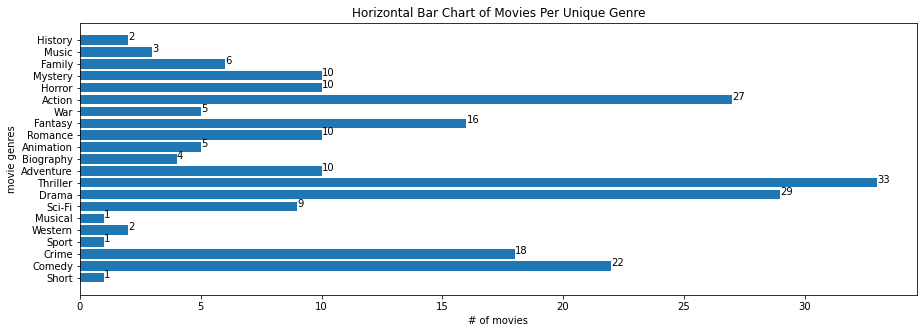

In [272]:
# Visualization 1
# Horizontal bar plot of unique genres and # of movies per each one

d_genres = list(dict_genres.keys())
d_values = list(dict_genres.values())
plt.rcParams['figure.figsize'] = [15, 5]
plt.barh(range(len(dict_genres)), d_values, tick_label=d_genres)
plt.xticks(rotation=0 )
for index, value in enumerate(d_values):
    plt.text(value, index,
             str(value))
plt.xlabel("# of movies")
plt.ylabel("movie genres")
plt.title("Horizontal Bar Chart of Movies Per Unique Genre")
plt.show()

In [26]:
def reassign_genre(multiple_genres):
    # function will assign the genre with most instances from group of multiple genres
    # whichever category of genres had the most highest number of instances replaces the group of genres with one the 
    # highest instance
    lst_genres = multiple_genres.split(";")
    # print(lst_genres)
    assigned_genre = ""
    max_instances = 0
    for genre in lst_genres:
        if dict_genres[genre] > max_instances:
            max_instances = dict_genres[genre]
            assigned_genre = genre
    # print(assigned_genre)
    # print()
    return assigned_genre

df["reassigned_genre"] = df["genres"].apply(lambda x: pd.Series(reassign_genre(x)))
print(df.head)

<bound method NDFrame.head of                             title  rating                 genres     votes  \
0       Butcher's Crossing - IMDb     NaN          Drama;Western       0.0   
1                        Renfield     NaN  Comedy;Fantasy;Horror       0.0   
2                     The Old Way     NaN         Action;Western       0.0   
3             The Retirement Plan     NaN          Action;Comedy       0.0   
4     Untitled Joe Exotic Project     NaN        Biography;Drama       0.0   
..                            ...     ...                    ...       ...   
104          Racing with the Moon     6.7   Comedy;Drama;Romance    4585.0   
105                   Rumble Fish     7.1    Crime;Drama;Romance   34306.0   
106                   Valley Girl     6.4         Comedy;Romance   15277.0   
107  Fast Times at Ridgemont High     7.1           Comedy;Drama  103612.0   
108             The Best of Times     5.4                 Comedy     264.0   

    languages runtimes      count

<h1><font color="blue">Find top genres (most instances) for prediction purposes</font></h1>

In [27]:
# Split the dataframe into individual dataframes per genre
# decide how many genres to be keep & which ones to remove
# first assumption and approximation
# extract movies with 10 or more instances only - reason is so there is a good number for training & testing
# create a list of top genres
# ideally need to run model for each genre to see how each looks but going to pick one
# choosing higher number of instances or lower, selective with choosing genre 
top_genres = []
for genre, num_instances in dict_genres.items():
    if num_instances >= 10:
        top_genres.append(genre)
print(top_genres) # there are 10 top genres

['Comedy', 'Crime', 'Drama', 'Thriller', 'Adventure', 'Romance', 'Fantasy', 'Action', 'Horror', 'Mystery']


<h1><font color="blue">Remove NaN from main dataframe</font></h1>

In [28]:
# Cleaning dataframe by removing ratings with NaN - 5 total
df_clean = df.dropna() #104 records with no NaN
print(df_clean.shape)

(104, 33)


<h1><font color="blue">Convert columns containing numbers as text</font></h1>

In [30]:
# Add numeric field for runtimes 
df_clean = df_clean.assign(runtimes_n = df_clean["runtimes"].astype("float"))
# Add numeric field for year
df_clean = df_clean.assign(year_n = df_clean["year"].astype("float"))

print(df_clean.columns)

Index(['title', 'rating', 'genres', 'votes', 'languages', 'runtimes',
       'countries', 'plot outline', 'director', 'year', 'writer', 'producer',
       'composer', 'cinematographer', 'editor', 'editorial department',
       'casting director', 'art direction', 'costume designer', 'make up',
       'production manager', 'assistant director', 'art department',
       'sound crew', 'special effects', 'visual effects', 'stunt performer',
       'production companies', 'distributors', 'special effects companies',
       'other companies', 'original air date', 'reassigned_genre',
       'runtimes_n', 'year_n'],
      dtype='object')


<h1><font color="blue">Reclassify ratings based on threshold</font></h1>

In [31]:
rtg_thres = 6.0 #equal to the average of ratings, using to decide if a movie is a success or not. 
# Rating for overall, not specifcially not genre

In [32]:
def classify_rtg(rtg, threshold):
    if rtg >= threshold:
        return 1
    else:
        return 0

# Insert a new column and calculate its values from a function
df_clean = df_clean.assign(reclassified_rating=df_clean["rating"].apply(lambda x: pd.Series(classify_rtg(x, rtg_thres))))
print(df_clean.columns)
#df_clean.head()

Index(['title', 'rating', 'genres', 'votes', 'languages', 'runtimes',
       'countries', 'plot outline', 'director', 'year', 'writer', 'producer',
       'composer', 'cinematographer', 'editor', 'editorial department',
       'casting director', 'art direction', 'costume designer', 'make up',
       'production manager', 'assistant director', 'art department',
       'sound crew', 'special effects', 'visual effects', 'stunt performer',
       'production companies', 'distributors', 'special effects companies',
       'other companies', 'original air date', 'reassigned_genre',
       'runtimes_n', 'year_n', 'reclassified_rating'],
      dtype='object')


<h1><font color="blue">Reclassify genre</font></h1>

In [33]:
# Multiple genres are assigned to the same movie in most cases; genres are listed in alphabetical order;
# to reassign the genre with most occurrences to the group as the most representative
print(df_clean["reassigned_genre"].value_counts() )
# 'Thriller' had more instances than 'action' and more movies were assigned to this genre
# Worst case 'Thriller' can be removed from genre and reassigned

Thriller    55
Drama       28
Comedy      11
Action       8
Fantasy      1
Horror       1
Name: reassigned_genre, dtype: int64


In [34]:
# Create a list of fields to be used in regression
reg_fields = ["title", "reassigned_genre", "votes", "runtimes_n", "year_n"]
pred_field = ["reclassified_rating"] 
final_fields = ["title", "reassigned_genre", "votes", "runtimes_n", "year_n", "reclassified_rating"]
print(final_fields)

['title', 'reassigned_genre', 'votes', 'runtimes_n', 'year_n', 'reclassified_rating']


In [35]:
df_clean_final = df_clean[final_fields]
print(df_clean_final.head())
# keep only the fields needed for the model
print(df_clean_final.columns)

                                     title reassigned_genre    votes  \
5  The Unbearable Weight of Massive Talent         Thriller  21647.0   
6                                      Pig         Thriller  66071.0   
7                       Willy's Wonderland         Thriller  27005.0   
8               Prisoners of the Ghostland         Thriller  10501.0   
9                    The Croods: A New Age           Comedy  40860.0   

   runtimes_n  year_n  reclassified_rating  
5       107.0  2022.0                    1  
6        92.0  2021.0                    1  
7        88.0  2021.0                    0  
8       103.0  2021.0                    0  
9        95.0  2020.0                    1  
Index(['title', 'reassigned_genre', 'votes', 'runtimes_n', 'year_n',
       'reclassified_rating'],
      dtype='object')


In [36]:
print(df_clean_final[df_clean_final["reassigned_genre"]=="Drama"].head(30))

                                                 title reassigned_genre  \
20                                                 211            Drama   
35                                          The Runner            Drama   
40                                                 Joe            Drama   
51                                           Astro Boy            Drama   
52            Bad Lieutenant: Port of Call New Orleans            Drama   
64                                     The Weather Man            Drama   
65                                         Lord of War            Drama   
68                                         Adaptation.            Drama   
69                                               Sonny            Drama   
70                                         Windtalkers            Drama   
72                          Captain Corelli's Mandolin            Drama   
73                                      The Family Man            Drama   
78                       

<h1><font color="blue">Dataframe for predicted records (small subset)</font></h1>
Because the NaN records do not include actual values in the predictive fields, they cannot be used for prediction of the ratings field.
<br />
Instead, a random small subset will be chosen for a particular genre (Drama)

In [37]:
pred_movies =  ['The Runner','City of Angels','Deadfall','It Could Happen to You']
df_pred = df_clean_final[df_clean_final["title"].isin(pred_movies)]
df_pred = df_pred.assign(reclassified_rating = -1)
print(df_pred.head())

                     title reassigned_genre     votes  runtimes_n  year_n  \
35              The Runner            Drama    5554.0        90.0  2015.0   
78          City of Angels            Drama  119733.0       114.0  1998.0   
85  It Could Happen to You            Drama   39434.0       101.0  1994.0   
87                Deadfall            Drama    3379.0        98.0  1993.0   

    reclassified_rating  
35                   -1  
78                   -1  
85                   -1  
87                   -1  


In [38]:
# Remove these movies from the main dataset 
print(df_clean_final.shape)
df_clean_final = df_clean_final[~df_clean_final["title"].isin(pred_movies)]
print(df_clean_final.shape)

(104, 6)
(100, 6)


In [39]:
# Number of instances of genres
# Drama: 28

# Extract records for drama only
df_pred_drama = df_pred[df_pred["reassigned_genre"].str.contains("Drama")]

In [40]:
#print(df_pred.head(10))
print(df_pred_drama.head())
#print(df_pred_comedy.head())

                     title reassigned_genre     votes  runtimes_n  year_n  \
35              The Runner            Drama    5554.0        90.0  2015.0   
78          City of Angels            Drama  119733.0       114.0  1998.0   
85  It Could Happen to You            Drama   39434.0       101.0  1994.0   
87                Deadfall            Drama    3379.0        98.0  1993.0   

    reclassified_rating  
35                   -1  
78                   -1  
85                   -1  
87                   -1  


In [41]:
# Create a pattern variable
pat = "".join("Drama") # search by a single genre, use empty string for join. If searching for multipe genre, use pipe | which means or.
# Join won't have a single word but a list of items.
df_drama = df_clean_final[df_clean_final["reassigned_genre"].str.contains(pat, case = True, regex = True, na=False)]
print(df_drama.shape)
print(df_drama.columns)

(24, 6)
Index(['title', 'reassigned_genre', 'votes', 'runtimes_n', 'year_n',
       'reclassified_rating'],
      dtype='object')


In [42]:
# Add numeric ID column for the model and calculate as a sequence
df_drama.insert(0, "movie_id", range(0, 0 + len(df_drama)))
# Make this new field the dataframe index
df_drama.set_index ('movie_id')
# reg_fields.insert(0, "movie_id") #no need to include in reg_fields
# X_drama = df_drama[reg_fields] 
X_drama = df_drama[final_fields]

# dropping the field 'reassigned_genre' because it's known that it is a drama 
# and as a constant value it does not contribute to the prediction accuracy
X_drama = X_drama.drop("reassigned_genre", axis = 1) 
Y_drama = df_drama[pred_field]

In [43]:
print(df_drama.columns)
print(X_drama.columns)

Index(['movie_id', 'title', 'reassigned_genre', 'votes', 'runtimes_n',
       'year_n', 'reclassified_rating'],
      dtype='object')
Index(['title', 'votes', 'runtimes_n', 'year_n', 'reclassified_rating'], dtype='object')


<h2><font color="blue">Drama dataframe - Create ranges for all numeric features used as predictors - votes, runtimes, year</font></h2>

In [45]:
X_drama_d = X_drama.describe()
print(X_drama_d)

# Want to find an objective way to reassign numeric values to categorical variables.
# in this case percentiles from the histogram

#=================================== VOTES ========================
#min votes
min_drama_votes = (X_drama_d.votes[3]) #5305.750000
print(min_drama_votes)
perc25_drama_votes = (X_drama_d.votes[4])
print(perc25_drama_votes)
perc75_drama_votes = (X_drama_d.votes[6])
print(perc75_drama_votes)
max_drama_votes = (X_drama_d.votes[7])
print(max_drama_votes)

X_drama_d_ranges_votes = [min_drama_votes, perc25_drama_votes, perc75_drama_votes]
print('X_drama_d_ranges_votes\n',X_drama_d_ranges_votes)
print()
#=================================== RUNTIMES ========================
min_drama_runtimes = (X_drama_d.runtimes_n[3]) #5305.750000
print(min_drama_runtimes)
perc25_drama_runtimes = (X_drama_d.runtimes_n[4])
print(perc25_drama_runtimes)
perc75_drama_runtimes = (X_drama_d.runtimes_n[6])
print(perc75_drama_runtimes)
max_drama_runtimes = (X_drama_d.runtimes_n[7])
print(max_drama_runtimes)

X_drama_d_ranges_runtimes = [min_drama_runtimes, perc25_drama_runtimes, perc75_drama_runtimes]
print('X_drama_d_runtimes\n',X_drama_d_ranges_runtimes)
print()
#=================================== YEAR ========================
min_drama_year = (X_drama_d.year_n[3]) #5305.750000
print(min_drama_year)
perc25_drama_year = (X_drama_d.year_n[4])
print(perc25_drama_year)
perc75_drama_year = (X_drama_d.year_n[6])
print(perc75_drama_year)
max_drama_year = (X_drama_d.year_n[7])
print(max_drama_year)

X_drama_d_ranges_year = [min_drama_year, perc25_drama_year, perc75_drama_year]
print('X_drama_d_year\n',X_drama_d_ranges_year)
print()

              votes  runtimes_n       year_n  reclassified_rating
count      24.00000   24.000000    24.000000            24.000000
mean    58209.75000  106.708333  1995.750000             0.750000
std     72186.43324   18.381179    10.738998             0.442326
min       782.00000   50.000000  1982.000000             0.000000
25%      7312.75000   95.500000  1986.000000             0.750000
50%     35411.50000  109.000000  1994.500000             1.000000
75%     77807.75000  120.500000  2002.750000             1.000000
max    312459.00000  134.000000  2018.000000             1.000000
782.0
7312.75
77807.75
312459.0
X_drama_d_ranges_votes
 [782.0, 7312.75, 77807.75]

50.0
95.5
120.5
134.0
X_drama_d_runtimes
 [50.0, 95.5, 120.5]

1982.0
1986.0
2002.75
2018.0
X_drama_d_year
 [1982.0, 1986.0, 2002.75]



In [46]:
# Reclassified votes for training, drama
X_drama_reclass = X_drama.copy(deep = True)

In [47]:
print(X_drama_reclass.head(20))

                                                 title     votes  runtimes_n  \
20                                                 211    8222.0        86.0   
40                                                 Joe   48345.0       117.0   
51                                           Astro Boy   36517.0        94.0   
52            Bad Lieutenant: Port of Call New Orleans   77053.0       122.0   
64                                     The Weather Man   80072.0       102.0   
65                                         Lord of War  312459.0       122.0   
68                                         Adaptation.  190632.0       115.0   
69                                               Sonny    4260.0       110.0   
70                                         Windtalkers   68973.0       134.0   
72                          Captain Corelli's Mandolin   34279.0       131.0   
73                                      The Family Man  109778.0       125.0   
82                                   Lea

In [48]:
def reclassify_votes(x, percentiles):
    #function will reassign the votes from the 3 percentile ranges to categorical variables 0, 1, 2
    #use 3 ranges as there are only a few records for training
    perc_min = percentiles[0]
    perc_25 = percentiles[1]
    perc_75 = percentiles[2]
    
    if x >= perc_min and x < perc_25:
        return 0
    elif x >= perc_25 and x < perc_75:
        return 1
    else:
        return 2
    
X_drama_reclass = X_drama_reclass.assign(reclassified_votes=X_drama_reclass["votes"].apply(lambda x: pd.Series(reclassify_votes(x, X_drama_d_ranges_votes))))
print(X_drama_reclass.head(20))

                                                 title     votes  runtimes_n  \
20                                                 211    8222.0        86.0   
40                                                 Joe   48345.0       117.0   
51                                           Astro Boy   36517.0        94.0   
52            Bad Lieutenant: Port of Call New Orleans   77053.0       122.0   
64                                     The Weather Man   80072.0       102.0   
65                                         Lord of War  312459.0       122.0   
68                                         Adaptation.  190632.0       115.0   
69                                               Sonny    4260.0       110.0   
70                                         Windtalkers   68973.0       134.0   
72                          Captain Corelli's Mandolin   34279.0       131.0   
73                                      The Family Man  109778.0       125.0   
82                                   Lea

<h2><font color="blue">Drama dataframe - reclassify numeric feature runtimes</font></h2>

In [49]:
def reclassify_runtimes(x, percentiles):
    #function will reassign the votes from the 3 percentile ranges to categorical variables 0, 1, 2
    #use 3 ranges as there are only a few records for training
    perc_min = percentiles[0]
    perc_25 = percentiles[1]
    perc_75 = percentiles[2]
    
    if x >= perc_min and x < perc_25:
        return 0
    elif x >= perc_25 and x < perc_75:
        return 1
    else:
        return 2
    
X_drama_reclass = X_drama_reclass.assign(reclassified_runtimes=X_drama_reclass["runtimes_n"].apply(lambda x: pd.Series(reclassify_runtimes(x, X_drama_d_ranges_runtimes))))
print(X_drama_reclass.head(20))
print(X_drama_reclass.columns)

                                                 title     votes  runtimes_n  \
20                                                 211    8222.0        86.0   
40                                                 Joe   48345.0       117.0   
51                                           Astro Boy   36517.0        94.0   
52            Bad Lieutenant: Port of Call New Orleans   77053.0       122.0   
64                                     The Weather Man   80072.0       102.0   
65                                         Lord of War  312459.0       122.0   
68                                         Adaptation.  190632.0       115.0   
69                                               Sonny    4260.0       110.0   
70                                         Windtalkers   68973.0       134.0   
72                          Captain Corelli's Mandolin   34279.0       131.0   
73                                      The Family Man  109778.0       125.0   
82                                   Lea

<h2><font color="blue">Drama dataframe for predicted movies</font></h2>

In [51]:
# DataFrame containing records for predicted movies 
print(df_pred_drama.columns)
print(df_pred_drama.head())

Index(['title', 'reassigned_genre', 'votes', 'runtimes_n', 'year_n',
       'reclassified_rating'],
      dtype='object')
                     title reassigned_genre     votes  runtimes_n  year_n  \
35              The Runner            Drama    5554.0        90.0  2015.0   
78          City of Angels            Drama  119733.0       114.0  1998.0   
85  It Could Happen to You            Drama   39434.0       101.0  1994.0   
87                Deadfall            Drama    3379.0        98.0  1993.0   

    reclassified_rating  
35                   -1  
78                   -1  
85                   -1  
87                   -1  


In [52]:
# Reclassify the votes for the dataframe containing records for prediction
df_pred_drama = df_pred_drama.assign(reclassified_votes=df_pred_drama["votes"].apply(lambda x: pd.Series(reclassify_votes(x, X_drama_d_ranges_votes))))
print(df_pred_drama.head(20))

                     title reassigned_genre     votes  runtimes_n  year_n  \
35              The Runner            Drama    5554.0        90.0  2015.0   
78          City of Angels            Drama  119733.0       114.0  1998.0   
85  It Could Happen to You            Drama   39434.0       101.0  1994.0   
87                Deadfall            Drama    3379.0        98.0  1993.0   

    reclassified_rating  reclassified_votes  
35                   -1                   0  
78                   -1                   2  
85                   -1                   1  
87                   -1                   0  


In [53]:
# Reclassify the runtimes for the dataframe containing records for prediction
df_pred_drama = df_pred_drama.assign(reclassified_runtimes=df_pred_drama["runtimes_n"].apply(lambda x: pd.Series(reclassify_runtimes(x, X_drama_d_ranges_runtimes))))
print(df_pred_drama.head(20))

                     title reassigned_genre     votes  runtimes_n  year_n  \
35              The Runner            Drama    5554.0        90.0  2015.0   
78          City of Angels            Drama  119733.0       114.0  1998.0   
85  It Could Happen to You            Drama   39434.0       101.0  1994.0   
87                Deadfall            Drama    3379.0        98.0  1993.0   

    reclassified_rating  reclassified_votes  reclassified_runtimes  
35                   -1                   0                      0  
78                   -1                   2                      1  
85                   -1                   1                      1  
87                   -1                   0                      1  


In [54]:
def reclassify_years(x, percentiles):
    # function will reassign the votes from the 3 percentile ranges to categorical variables 0, 1, 2
    # use 3 ranges as there are only a few records for training
    perc_min = percentiles[0]
    perc_25 = percentiles[1]
    perc_75 = percentiles[2]
    
    if x >= perc_min and x < perc_25:
        return 0
    elif x >= perc_25 and x < perc_75:
        return 1
    else:
        return 2

In [55]:
df_pred_drama = df_pred_drama.assign(reclassified_year=df_pred_drama["year_n"].apply(lambda x: pd.Series(reclassify_years(x, X_drama_d_ranges_year))))
print(df_pred_drama.head(20))

                     title reassigned_genre     votes  runtimes_n  year_n  \
35              The Runner            Drama    5554.0        90.0  2015.0   
78          City of Angels            Drama  119733.0       114.0  1998.0   
85  It Could Happen to You            Drama   39434.0       101.0  1994.0   
87                Deadfall            Drama    3379.0        98.0  1993.0   

    reclassified_rating  reclassified_votes  reclassified_runtimes  \
35                   -1                   0                      0   
78                   -1                   2                      1   
85                   -1                   1                      1   
87                   -1                   0                      1   

    reclassified_year  
35                  2  
78                  1  
85                  1  
87                  1  


In [56]:
df_pred_drama4model = df_pred_drama.copy(deep=True)
df_pred_drama4model = df_pred_drama.drop(["title", "reassigned_genre", "votes", "runtimes_n", "year_n"], axis = 1)
#df.drop(['A'], axis = 1)
print(df_pred_drama4model.head())
print(df_pred_drama4model.columns)
'''
- movie_id
- reclassified_runtimes
- reclassified_votes
- reclassified_year'''

    reclassified_rating  reclassified_votes  reclassified_runtimes  \
35                   -1                   0                      0   
78                   -1                   2                      1   
85                   -1                   1                      1   
87                   -1                   0                      1   

    reclassified_year  
35                  2  
78                  1  
85                  1  
87                  1  
Index(['reclassified_rating', 'reclassified_votes', 'reclassified_runtimes',
       'reclassified_year'],
      dtype='object')


'\n- movie_id\n- reclassified_runtimes\n- reclassified_votes\n- reclassified_year'

<h2><font color="blue">Drama dataframe - Create ranges for numeric feature year</font></h2>

In [57]:
X_drama_reclass = X_drama_reclass.assign(reclassified_year=X_drama_reclass["year_n"].apply(lambda x: pd.Series(reclassify_years(x, X_drama_d_ranges_year))))
print(X_drama_reclass.head(20))

                                                 title     votes  runtimes_n  \
20                                                 211    8222.0        86.0   
40                                                 Joe   48345.0       117.0   
51                                           Astro Boy   36517.0        94.0   
52            Bad Lieutenant: Port of Call New Orleans   77053.0       122.0   
64                                     The Weather Man   80072.0       102.0   
65                                         Lord of War  312459.0       122.0   
68                                         Adaptation.  190632.0       115.0   
69                                               Sonny    4260.0       110.0   
70                                         Windtalkers   68973.0       134.0   
72                          Captain Corelli's Mandolin   34279.0       131.0   
73                                      The Family Man  109778.0       125.0   
82                                   Lea

<h1><font color="blue">Creating a model for 'drama'</font></h1>

In [58]:
# Creating train and test split to help prevent overfitting, added reclassified_rating to dropped fields
X_drama_reclass4model = X_drama_reclass.drop(["reclassified_rating","title", "votes", "runtimes_n", "year_n"], axis = 1) # dropping the field 'title' because we have movie_id

'''
print(X_train_drama.shape)
print(X_train_drama.columns)
print(X_test_drama.shape)
print(X_test_drama.columns)
print(y_train_drama.shape)
print(y_train_drama.columns)
print(y_test_drama.shape)
print(y_test_drama.columns)
'''

'\nprint(X_train_drama.shape)\nprint(X_train_drama.columns)\nprint(X_test_drama.shape)\nprint(X_test_drama.columns)\nprint(y_train_drama.shape)\nprint(y_train_drama.columns)\nprint(y_test_drama.shape)\nprint(y_test_drama.columns)\n'

In [59]:
print(X_drama_reclass4model.head(20))

     reclassified_votes  reclassified_runtimes  reclassified_year
20                    1                      0                  2
40                    1                      1                  2
51                    1                      0                  2
52                    1                      2                  2
64                    2                      1                  2
65                    2                      2                  2
68                    2                      1                  1
69                    0                      1                  1
70                    1                      2                  1
72                    1                      2                  1
73                    2                      2                  1
82                    2                      1                  1
86                    1                      1                  1
92                    0                      0                  1
95        

<h2><font color="blue">Drama model - training and test datasets</font></h2>

In [238]:
# Create an instance of the logistic regression model
lr_drama = LogisticRegression()

In [239]:
test_dataset_size = 0.35 #35% of total; can be modified and prediction results compared
X_train_drama, X_test_drama, y_train_drama, y_test_drama = train_test_split(X_drama_reclass4model, Y_drama, test_size=test_dataset_size, random_state=np.random)

In [240]:
print(f'Size of X_train_drama (dataset containing training data, {100-test_dataset_size*100}% of all data) is {X_train_drama.shape}')
print(f'Size of y_train_drama (true values of field "ratings" for training dataset) is {y_train_drama.shape}')
print(f'Size of X_test_drama (dataset containing test data, {test_dataset_size * 100}% of all data) is {X_test_drama.shape}')
print(f'Size of y_test_drama (true values of field "ratings" for test dataset) is {y_test_drama.shape}')

Size of X_train_drama (dataset containing training data, 65.0% of all data) is (15, 3)
Size of y_train_drama (true values of field "ratings" for training dataset) is (15, 1)
Size of X_test_drama (dataset containing test data, 35.0% of all data) is (9, 3)
Size of y_test_drama (true values of field "ratings" for test dataset) is (9, 1)


In [241]:
# Training dataset and values for field "ratings"
print(X_train_drama.head(X_train_drama.shape[0]))
print(y_train_drama.head(y_train_drama.shape[0]))

     reclassified_votes  reclassified_runtimes  reclassified_year
98                    1                      1                  1
65                    2                      2                  2
102                   1                      1                  0
86                    1                      1                  1
51                    1                      0                  2
70                    1                      2                  1
103                   1                      2                  0
104                   0                      1                  0
107                   2                      0                  0
105                   1                      0                  0
72                    1                      2                  1
101                   0                      1                  1
40                    1                      1                  2
69                    0                      1                  1
92        

In [242]:
# Test dataset and true values for field "ratings" # true values are already known
print('Test dataset:\n', X_test_drama.head(X_test_drama.shape[0]))
# these are the true rating values, try to predict with the model
print('True ratings values:\n', y_test_drama.head(y_test_drama.shape[0]))

Test dataset:
      reclassified_votes  reclassified_runtimes  reclassified_year
68                    2                      1                  1
100                   1                      1                  1
64                    2                      1                  2
95                    0                      1                  1
73                    2                      2                  1
82                    2                      1                  1
96                    0                      0                  1
20                    1                      0                  2
52                    1                      2                  2
True ratings values:
      reclassified_rating
68                     1
100                    1
64                     1
95                     0
73                     1
82                     1
96                     0
20                     0
52                     1


In [243]:
# Fit the Model - use np.ravel to avoid sklearn error
'''
DataConversionWarning: A column-vector y was passed when a 1d array was expected. 
Please change the shape of y to (n_samples, ), for example using ravel().
''' 
drama_model = lr_drama.fit(X_train_drama, np.ravel(y_train_drama))
# need to convert all string data to numeric with pandas dummies

In [244]:
# Use the model to predict test from train data
y_test_pred_drama = lr_drama.predict(X_test_drama)
print(f'Predicted ratings: \n{y_test_pred_drama}')


Predicted ratings: 
[1 1 1 1 1 1 1 1 1]


In [245]:
# Create a confusion matrix for the ratings in test data set (35%) predicted from training data set (65%)
conf_matrix_test_drama = metrics.confusion_matrix(y_test_drama, y_test_pred_drama) # what are actual values vs. predicted ones
print(conf_matrix_test_drama)
tn, fp, fn, tp = conf_matrix_test_drama.ravel()
print(f"true negative: {tn}\n false positive: {fp}\n false negative: {fn}\n true positive: {tp}")
# check the values of true positives and true negatives
print(f'True values: {y_test_drama}\nPredicted ratings values: {y_test_pred_drama}')
prediction_accuracy = round(metrics.accuracy_score(y_test_drama, y_test_pred_drama), 2)
print(f"Accuracy of prediction for DRAMA movie in test dataset to have a rating greater than the average {rtg_thres} is {prediction_accuracy}")

[[0 3]
 [0 6]]
true negative: 0
 false positive: 3
 false negative: 0
 true positive: 6
True values:      reclassified_rating
68                     1
100                    1
64                     1
95                     0
73                     1
82                     1
96                     0
20                     0
52                     1
Predicted ratings values: [1 1 1 1 1 1 1 1 1]
Accuracy of prediction for DRAMA movie in test dataset to have a rating greater than the average 6.0 is 0.67


In [ ]:
'''
Results from 10 runs for DRAMA genre with the sampe split of training/test datasets:

Run 1, prediction accuracy of model = 0.78
Run 2, prediction accuracy of model = 0.67
Run 3, prediction accuracy of model = 0.78
Run 4, prediction accuracy of model = 0.78
Run 5, prediction accuracy of model = 0.56
Run 6, prediction accuracy of model = 0.56 
Run 7, prediction accuracy of model = 0.89
Run 8, prediction accuracy of model = 0.78
Run 9, prediction accuracy of model = 0.67
Run 10, prediction accuracy of model = 0.67

Results from 10 runs of model accuracy:

Run 1, model accuracy = 0.75
Run 2, model accuracy = 0.75
Run 3, model accuracy = 0.75
Run 4, model accuracy = 0.75
Run 5, model accuracy = 0.75
Run 6, model accuracy = 0.50
Run 7, model accuracy = 1.00
Run 8, model accuracy = 1.00
Run 9, model accuracy = 0.50
Run 10, model accuracy = 0.50

runs = ['Run1', 'Run2', 'Run3', 'Run4', 'Run5', 'Run6', 'Run7', 'Run8', 'Run9', 'Run10']
prediction_accuracies = [0.78, 0.67, 0.78, 0.78, 0.56, 0.56, 0.89, 0.78, 0.67, 0.67]
model_accuracies = [0.75, 0.75, 0.75, 0.75, 0.75, 0.50, 1.00, 1.00, 0.50, 0.50]
'''

<h1><font color="blue">Execute model on dataset containing movies for rating prediction</font></h1>

In [246]:
df_pred_drama4model = df_pred_drama4model.reindex(columns=['reclassified_votes', 'reclassified_runtimes',
       'reclassified_year'])
print(df_pred_drama4model.columns)
print(df_pred_drama4model.head())

Index(['reclassified_votes', 'reclassified_runtimes', 'reclassified_year'], dtype='object')
    reclassified_votes  reclassified_runtimes  reclassified_year
35                   0                      0                  2
78                   2                      1                  1
85                   1                      1                  1
87                   0                      1                  1


In [247]:
print(df_pred_drama4model.head())

    reclassified_votes  reclassified_runtimes  reclassified_year
35                   0                      0                  2
78                   2                      1                  1
85                   1                      1                  1
87                   0                      1                  1


In [248]:
# Use the model to predict from test data
y_pred_drama = lr_drama.predict(df_pred_drama4model)
print(df_pred_drama4model)
print(y_pred_drama)

    reclassified_votes  reclassified_runtimes  reclassified_year
35                   0                      0                  2
78                   2                      1                  1
85                   1                      1                  1
87                   0                      1                  1
[1 1 1 1]


In [249]:
# Create user-friendly output for the predicted movies
# Because of the reindexing, using the index from the backup
df_predicted_movies = pd.DataFrame(df_backup.iloc[[35, 78, 85, 87]], 
                columns =['title', 'rating', 'genres'])
print(df_predicted_movies.head())

                     title  rating                 genres
35              The Runner     4.7                  Drama
78          City of Angels     6.7  Drama;Fantasy;Romance
85  It Could Happen to You     6.4   Comedy;Drama;Romance
87                Deadfall     4.0            Crime;Drama


In [250]:
idxs = list(df_predicted_movies.index)
print(idxs)
df_y_pred_drama = pd.DataFrame(y_pred_drama, columns=['predicted_rating_greater_than_average'])

df_y_pred_drama['movie_id'] = idxs

df_y_pred_drama = df_y_pred_drama.set_index('movie_id')
print(df_y_pred_drama)
# If 1 is rating that's means it's over 6.0 for ratings, movie ID shows what actual rating is, 
# then compare it to see if it is true or not.

[35, 78, 85, 87]
          predicted_rating_greater_than_average
movie_id                                       
35                                            1
78                                            1
85                                            1
87                                            1


In [251]:
df_predicted_movies_merged = pd.merge(df_y_pred_drama,                          # Inner join based on index
                       df_predicted_movies,
                       left_index = True,
                       right_index = True)
print(df_predicted_movies_merged.head())

          predicted_rating_greater_than_average                   title  \
movie_id                                                                  
35                                            1              The Runner   
78                                            1          City of Angels   
85                                            1  It Could Happen to You   
87                                            1                Deadfall   

          rating                 genres  
movie_id                                 
35           4.7                  Drama  
78           6.7  Drama;Fantasy;Romance  
85           6.4   Comedy;Drama;Romance  
87           4.0            Crime;Drama  


In [252]:
# reclassify rating 
df_predicted_movies_merged = df_predicted_movies_merged.assign(reclassified_rating=df_predicted_movies_merged["rating"].apply(lambda x: pd.Series(classify_rtg(x, rtg_thres))))

In [253]:
print(df_predicted_movies_merged.columns)
print(df_predicted_movies_merged.head())

Index(['predicted_rating_greater_than_average', 'title', 'rating', 'genres',
       'reclassified_rating'],
      dtype='object')
          predicted_rating_greater_than_average                   title  \
movie_id                                                                  
35                                            1              The Runner   
78                                            1          City of Angels   
85                                            1  It Could Happen to You   
87                                            1                Deadfall   

          rating                 genres  reclassified_rating  
movie_id                                                      
35           4.7                  Drama                    0  
78           6.7  Drama;Fantasy;Romance                    1  
85           6.4   Comedy;Drama;Romance                    1  
87           4.0            Crime;Drama                    0  


In [254]:
pred_pred_rating = (df_predicted_movies_merged['predicted_rating_greater_than_average'])
pred_true_rating = (df_predicted_movies_merged['reclassified_rating'])

In [255]:
def calcConfMatAccuracy(true_list, predicted_list):
    # needs numpy
    y_true = np.array(true_list)
    y_pred = np.array(predicted_list)
    acc = (y_true == y_pred).sum() / float(len(y_true))
    return acc

In [256]:
l_true = np.array(pred_true_rating)
l_pred = np.array(pred_pred_rating)
cf_acc = calcConfMatAccuracy(l_true, l_pred)
print(f'The prediction accuracy for the selected movies is {cf_acc}')

The prediction accuracy for the selected movies is 0.5


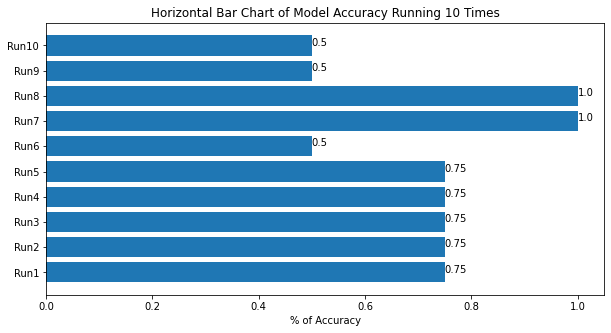

Mean model accuracy: 0.725
Variance of model accuracy: 0.034027777777777775


In [273]:
# Visualization 2
# Horizontal Bar Plot of the model accuracy on multiple runs.
# Collect the accuracy in a list and save in a commented out cell

'''
runs = ['Run1', 'Run2', 'Run3', 'Run4', 'Run5', 'Run6', 'Run7', 'Run8', 'Run9', 'Run10']
model_accuracies = [0.75, 0.75, 0.75, 0.75, 0.75, 0.50, 1.00, 1.00, 0.50, 0.50]

'''

runs = ['Run1', 'Run2', 'Run3', 'Run4', 'Run5', 'Run6', 'Run7', 'Run8', 'Run9', 'Run10']
model_accuracies = [0.75, 0.75, 0.75, 0.75, 0.75, 0.50, 1.00, 1.00, 0.50, 0.50]

plt.rcParams['figure.figsize'] = [10, 5]
plt.barh(range(len(runs)), model_accuracies, tick_label=runs)
plt.xticks(rotation=0 )
for index, value in enumerate(model_accuracies):
    plt.text(value, index,
             str(value))
plt.xlabel("% of Accuracy")
plt.title("Horizontal Bar Chart of Model Accuracy Running 10 Times")
plt.show()

print(f'Mean model accuracy: {statistics.mean(model_accuracies)}')
# Variance: how far the set of values are spread out far away from the average value.
print(f'Variance of model accuracy: {statistics.variance(model_accuracies)}')


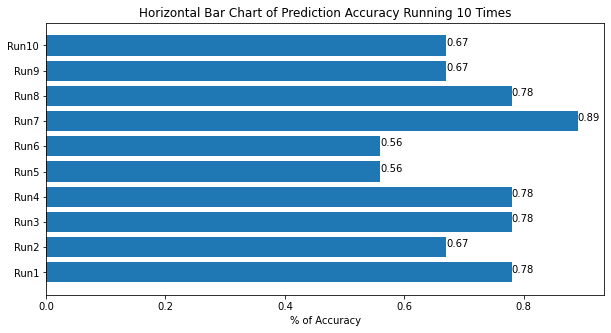

Mean prediction accuracy: 0.7140000000000001
Variance of prediction accuracy: 0.01129333333333333


In [274]:
# Visualization 3
# Horizontal Bar Plot of the prediction accuracy on multiple runs.
# Collect the predicted accuracy in a list and save in a commented out cell

'''
runs = ['Run1', 'Run2', 'Run3', 'Run4', 'Run5', 'Run6', 'Run7', 'Run8', 'Run9', 'Run10']
prediction_accuracies = [0.78, 0.67, 0.78, 0.78, 0.56, 0.56, 0.89, 0.78, 0.67, 0.67]

'''

prediction_accuracies = [0.78, 0.67, 0.78, 0.78, 0.56, 0.56, 0.89, 0.78, 0.67, 0.67]
plt.rcParams['figure.figsize'] = [10, 5]
plt.barh(range(len(runs)), prediction_accuracies, tick_label=runs)
plt.xticks(rotation=0 )
for index, value in enumerate(prediction_accuracies):
    plt.text(value, index,
             str(value))
plt.xlabel("% of Accuracy")
plt.title("Horizontal Bar Chart of Prediction Accuracy Running 10 Times")
plt.show()

print(f'Mean prediction accuracy: {statistics.mean(prediction_accuracies)}')
# Variance: how far the set of values are spread out far away from the average value.
print(f'Variance of prediction accuracy: {statistics.variance(prediction_accuracies)}')